**Задание**

**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. **Целевая переменная** – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.

  а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.

  а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

  b) Исследуйте признаки на выбросы несколькими способами.

  c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.

  а) Кратко опишите, какие преобразования были сделаны с данными.

  b) Сравните точность двух моделей.

  c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

**Результат:**

Получены практические знания по работе с выбросами в данных.

In [2]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn import metrics

import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

%matplotlib inline

**1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).**

In [3]:
#Получаем данные и загружаем их в рабочую среду
df_glass_class = pd.read_csv('/content/glass.csv.xls')
df_glass_class.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**2. Проведите первичный анализ.**

а) Проверьте количество записей для каждого класса. Сделайте вывод.


In [4]:
df_glass_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Пропусков не выявлено, типы данных корректные.

In [5]:
#Проверим дубликаты, уберем их, если они есть
df_glass_class = df_glass_class.drop_duplicates()
df_glass_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [6]:
df_glass_class.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Вероятно, некоторые столбцы (например, K и  Ca) содержат выбросы. Требуется дополнительный анализ.

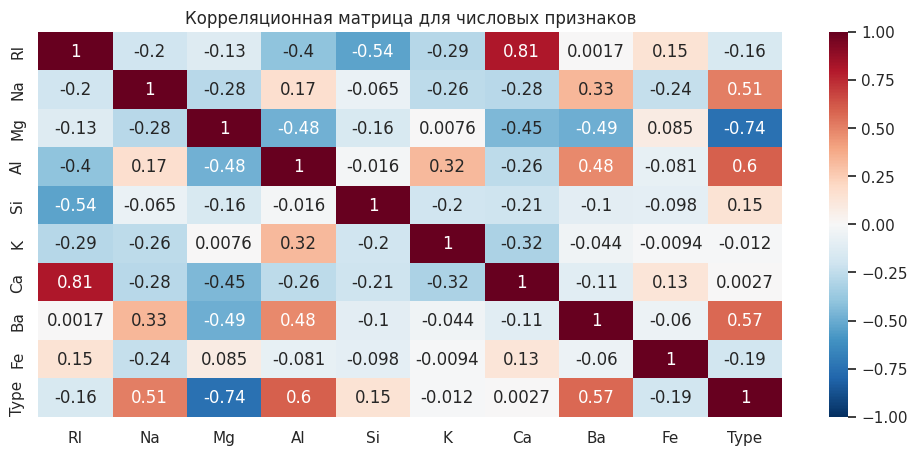

In [7]:
#Построим тепловую корреляционную матрицу

sns.set(font_scale=1.0)
plt.figure(figsize=(12,5))
sns.heatmap(
    df_glass_class.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

Как следует из корреляционной матрицы, линейная зависимость целевой переменной прослеживается со следующими признаками: Na, Mg, Al, Ba.

С остальными признаками либо зависимости нет совсем, либо она нелинейная.

In [8]:
#Посмотрим на количество объектов внутри целевого класса Type
df_glass_class['Type'].value_counts()

,count
Type,
2,76
1,69
7,29
3,17
5,13
6,9


In [9]:
df_glass_class['Type'].value_counts(normalize=True)

#normalize=True возвращает объект, содержащий информацию
#об относительной частоте уникальных значений

,proportion
Type,
2,0.356808
1,0.323944
7,0.136150
3,0.079812
5,0.061033
6,0.042254


**Относительно целевой переменной можно сказать следующее:**
1. Целевой класс несбалансированный (68 % всех объектов принадлежат 1 и 2 категории (всего 6 категорий)
2. Отсутствует категория под номером 4
3. Значения целевой переменной нужно закодировать.

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**


In [10]:
X = df_glass_class.loc[:, df_glass_class.columns != 'Type'] #признаки
y = df_glass_class['Type'].astype(str) #Целевая переменная

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**


In [12]:
#Сформируем датасет для дальнейшей работы
#(с обработанными категориальными признаками для тренировочного датасета)
y_train = pd.get_dummies(y_train, columns='Type')
y_train.head()

,1,2,3,5,6,7
201,False,False,False,False,False,True
38,True,False,False,False,False,False
30,True,False,False,False,False,False
24,True,False,False,False,False,False
121,False,True,False,False,False,False


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Создание модели
rfc_model_0 = RandomForestClassifier(n_estimators=100, #Количество деревьев
                                     random_state=42)

# Обучение модели
rfc_model_0.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Для улучшения производительности модели используем Grid Search для подбора оптимальных гиперпараметров.

Grid Search позволяет автоматически перебирать различные комбинации гиперпараметров и выбирать наилучшую из них.

Создадим словарь с гиперпараметрами, которые мы хотим настроить, и используем GridSearchCV для поиска лучших параметров.

В данном примере мы будем настраивать количество деревьев (n_estimators), максимальную глубину деревьев (max_depth), минимальное количество образцов для разбиения узла (min_samples_split) и минимальное количество образцов в листе (min_samples_leaf)

In [15]:
# Определение гиперпараметров для настройки
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=rfc_model_0, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


**5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Создание модели с лучшими параметрами
best_rfc_model_0 = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred_best = best_rfc_model_0.predict(X_test)

In [19]:
y_pred_best[:5]

array([[False, False, False, False, False,  True],
       [False, False, False,  True, False, False],
       [False,  True, False, False, False, False],
       [False, False, False,  True, False, False],
       [ True, False, False, False, False, False]])

In [20]:
y_test = pd.get_dummies(y_test, columns='Type')
y_test.head()

,1,2,3,5,6,7
208,False,False,False,False,False,True
169,False,False,False,True,False,False
122,False,True,False,False,False,False
172,False,False,False,True,False,False
29,True,False,False,False,False,False


In [21]:
y_test.values[:5]

array([[False, False, False, False, False,  True],
       [False, False, False,  True, False, False],
       [False,  True, False, False, False, False],
       [False, False, False,  True, False, False],
       [ True, False, False, False, False, False]])

In [22]:
# Оценка точности модели с лучшими параметрами
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность модели best_rfc_model_0: {best_accuracy:.2f}")

Точность модели best_rfc_model_0: 0.67


**6. Обработайте выбросы в данных.**


In [23]:
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.0,0.00
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21


**а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?**

In [24]:
#Список признаков
cols = list(X_train.columns)

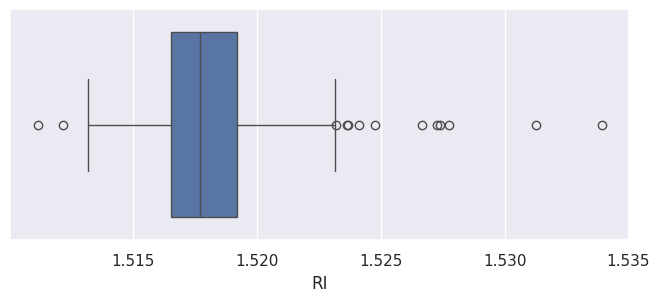

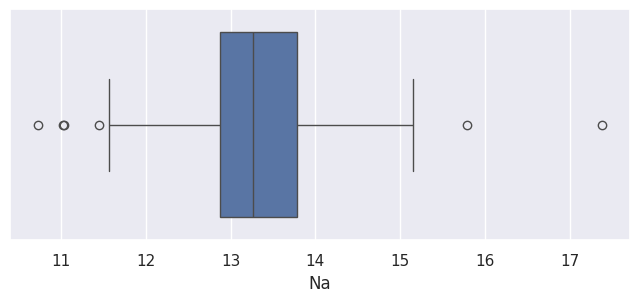

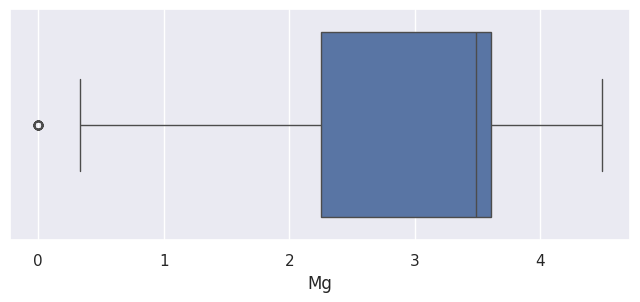

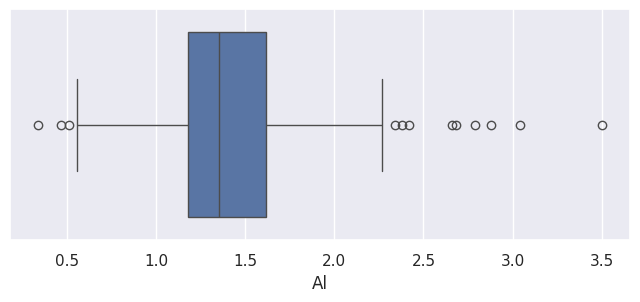

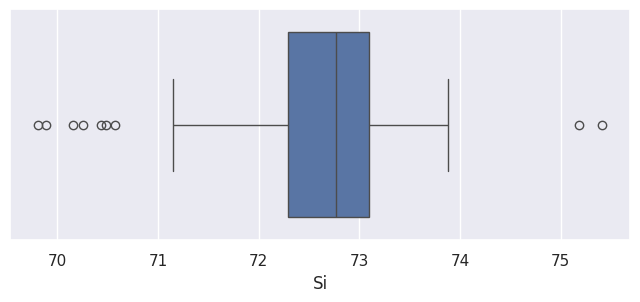

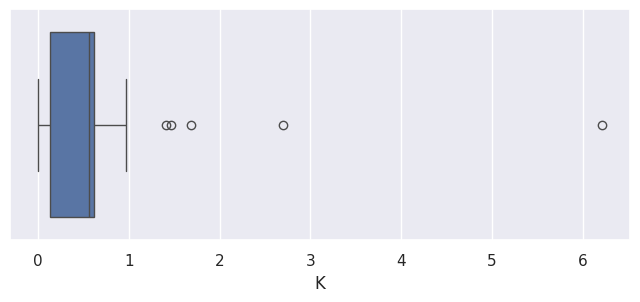

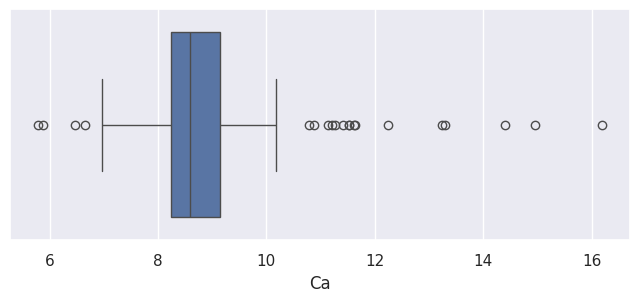

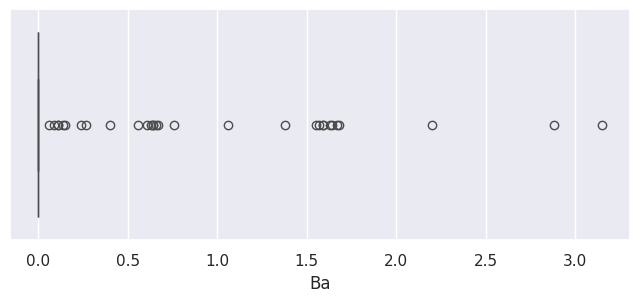

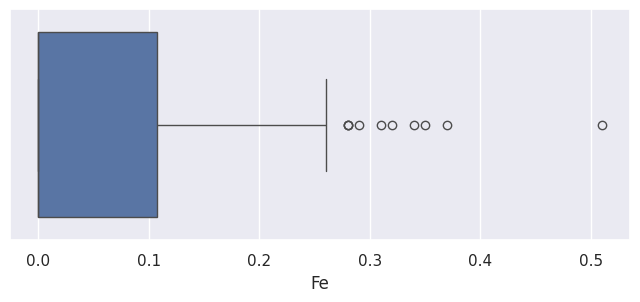

In [25]:
#Посмотрим на выбросы
for col in cols:
    plt.figure(figsize=(8, 3))
    x = X_train.index
    ax = sns.boxplot(x=X_train[col])
    plt.show()

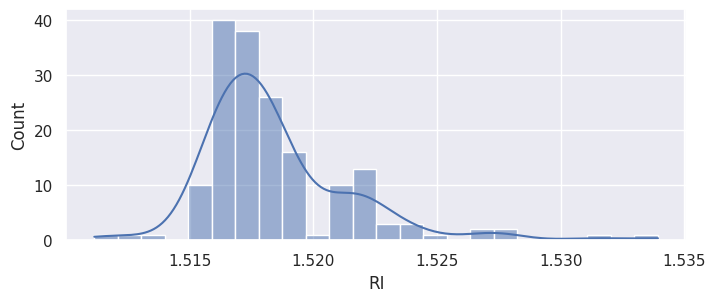

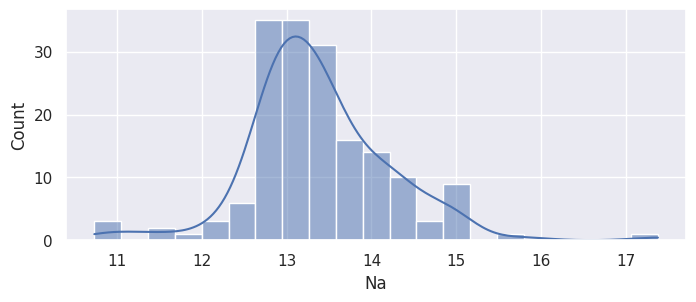

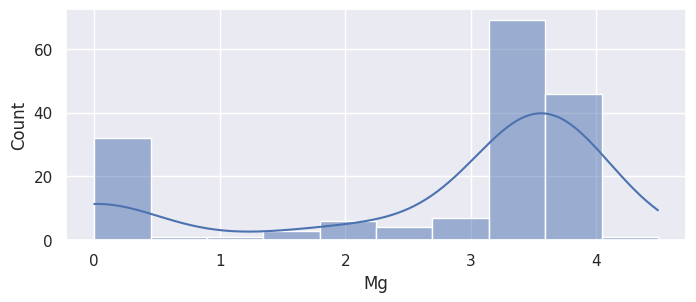

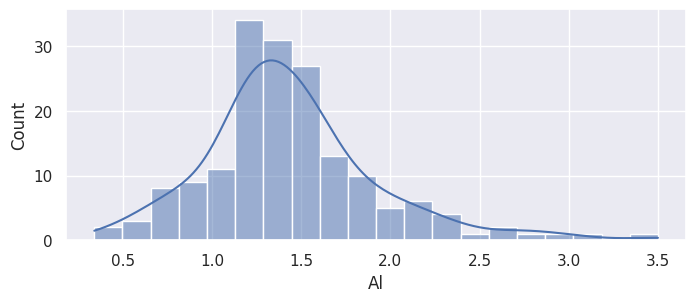

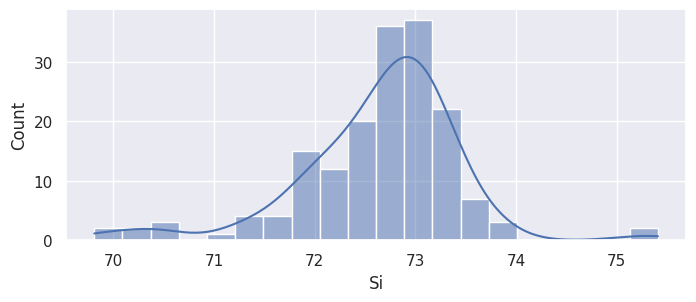

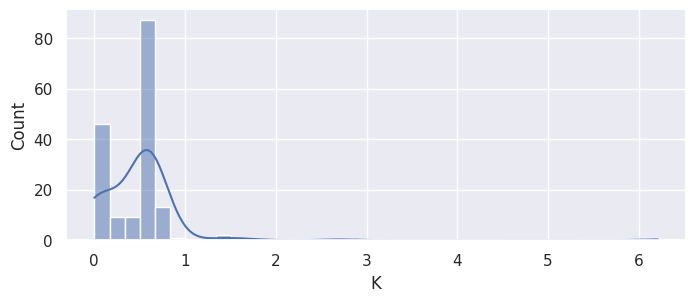

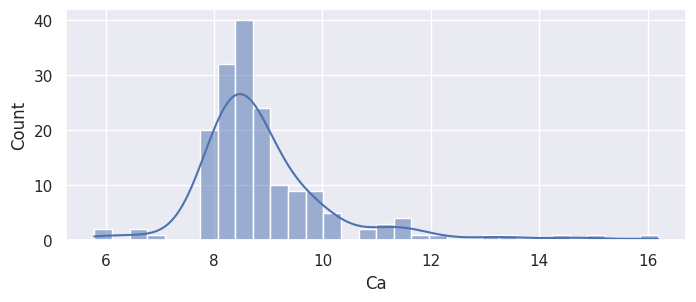

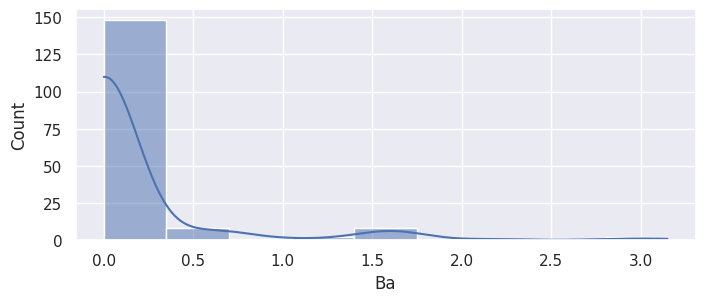

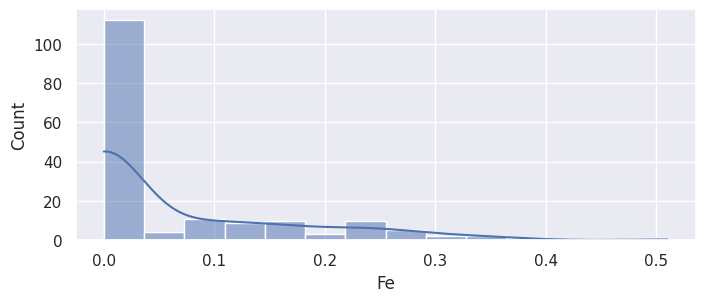

In [26]:
#Посмотрим на выбросы
for col in cols:
    plt.figure(figsize=(8, 3))
    x = X_train.index
    ax = sns.histplot(x=X_train[col], kde=True)
    plt.show()

Как следует из графиков выше, относительно нормальное распределение имеют следующие признаки: RI, Na, Al, Si, Ca.

Вместе с тем, в значениях признаков содержатся выбросы, которые искажают общее представление о признаках.

**b) Исследуйте признаки на выбросы несколькими способами.**

Количественно выбросы можно найти через **стандартизированную оценку (z-оценку, z-score)**. Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего.

In [28]:
from scipy import stats

z = stats.zscore(X_train)
z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
201,-0.641015,-1.714126,-1.935079,-0.512929,3.211822,3.979591,-0.017226,-0.345668,-0.611697
38,1.183992,0.998483,0.765631,-1.999961,-1.098016,-0.681420,0.450152,-0.345668,-0.611697
30,-0.266236,-0.873937,0.581813,-0.285743,0.557669,0.218389,-0.192493,-0.345668,0.768245
24,-0.422665,0.002259,0.539393,-0.595542,0.266977,0.020431,-0.382365,-0.345668,-0.611697
121,-0.608425,-0.537862,0.567673,0.375160,0.406004,0.272378,-0.674476,-0.345668,1.458216


Так как мы знаем, что 99,7 процентов наблюдений лежат в пределах трех СКО от среднего, то можем предположить, что выбросами будут оставшиеся 0,3 процента.

Выведем эти значения.

In [29]:
# найдем те значения, которые отклоняются больше чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1),
# где хотя бы одно значение True (т.е. > 3)
X_train[(np.abs(z) > 3).any(axis = 1)].head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
201,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.00
106,1.53125,10.73,0.0,2.10,69.81,0.58,13.30,3.15,0.28
188,1.52247,14.86,2.2,2.06,70.26,0.76,9.76,0.00,0.00
111,1.52739,11.02,0.0,0.75,73.08,0.00,14.96,0.00,0.00
105,1.52475,11.45,0.0,1.88,72.19,0.81,13.24,0.00,0.34


In [30]:
# Количество выбросов по z-оценке
len(X_train[(np.abs(z) > 3).any(axis = 1)])

13

 Удалим выбросы во всем датафрейме.

In [31]:
# если в строке (axis = 1) есть хотя бы один False как следствие условия np.abs(z) < 3
# метод .all() вернет логический массив, который можно использовать как фильтр
z_mask = (np.abs(z) < 3).all(axis = 1)

X_train_z = X_train[z_mask]
X_train_z.shape

(157, 9)

In [32]:
X_train_z.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.00,0.21
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00
55,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24


In [33]:
y_train.head()

,1,2,3,5,6,7
201,False,False,False,False,False,True
38,True,False,False,False,False,False
30,True,False,False,False,False,False
24,True,False,False,False,False,False
121,False,True,False,False,False,False


In [34]:
df_train_no_outliers = X_train_z.join(y_train, how='inner')
df_train_no_outliers.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,1,2,3,5,6,7
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,True,False,False,False,False,False
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,True,False,False,False,False,False
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,True,False,False,False,False,False
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,False,True,False,False,False,False
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,False,True,False,False,False,False


In [35]:
print(df_train_no_outliers.shape)

(157, 15)


Выведем корреляцию до и после удаления выбросов.

In [36]:
df_train_with_outliers = X_train.join(y_train, how='left')

In [37]:
df_train_with_outliers.shape

(170, 15)

In [38]:
df_train_with_outliers.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,1,2,3,5,6,7
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.0,0.00,False,False,False,False,False,True
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,True,False,False,False,False,False
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,True,False,False,False,False,False
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,True,False,False,False,False,False
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,False,True,False,False,False,False


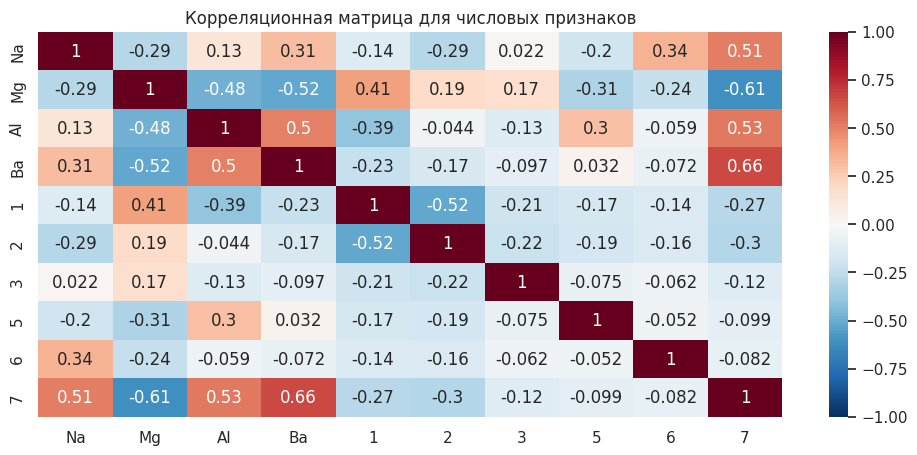

In [39]:
#Построим тепловую корреляционную матрицу (до удаления выбросов)

sns.set(font_scale=1.0)
plt.figure(figsize=(12,5))
sns.heatmap(
    df_train_with_outliers[['Na', 'Mg', 'Al', 'Ba', '1', '2', '3', '5', '6', '7']].corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

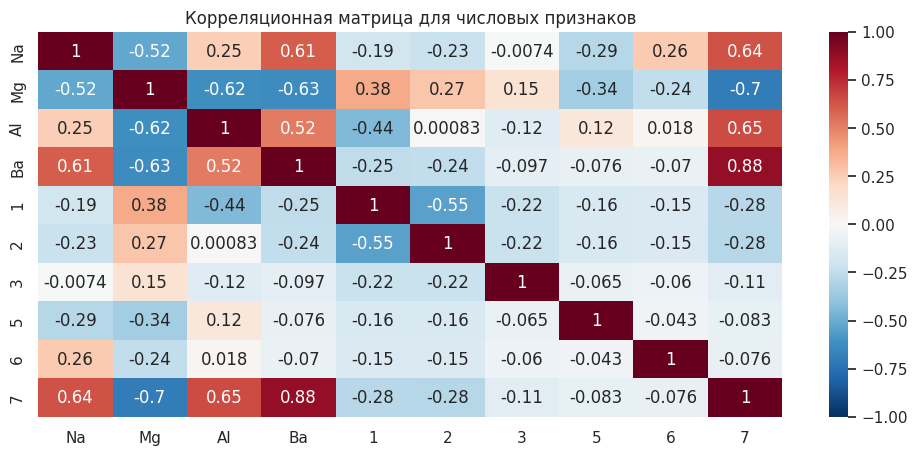

In [40]:
#Построим тепловую корреляционную матрицу (после удаления выбросов)

sns.set(font_scale=1.0)
plt.figure(figsize=(12,5))
sns.heatmap(
    df_train_no_outliers[['Na', 'Mg', 'Al', 'Ba', '1', '2', '3', '5', '6', '7']].corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

**Вывод:** после удаления выбросов корреляция целевой переменной с признаками Na, Mg, Al, Ba увеличилась.

**Теперь посмотрим на один из методов выявления выбросов, основанный на модели - Isolation Forest**

Применим алгоритм изолирующего леса к нашему датасету.

In [41]:
X_df_train_no_outliers = df_train_no_outliers.drop(columns = ['1', '2', '3', '5', '6', '7']) #признаки

In [42]:
y_df_train_no_outliers = df_train_no_outliers[['1', '2', '3', '5', '6', '7']] #целевой класс
y_df_train_no_outliers.head()

,1,2,3,5,6,7
38,True,False,False,False,False,False
30,True,False,False,False,False,False
24,True,False,False,False,False,False
121,False,True,False,False,False,False
143,False,True,False,False,False,False


In [43]:
from sklearn.ensemble import IsolationForest

In [44]:
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(X_df_train_no_outliers)

# создадим столбец с anomaly_score
df_train_no_outliers['scores'] = clf.decision_function(X_df_train_no_outliers)
# и результатом (выброс (-1) или нет (1))
df_train_no_outliers['anomaly'] = clf.predict(X_df_train_no_outliers)

# посмотрим на количество выбросов
df_train_no_outliers[df_train_no_outliers.anomaly == -1].shape[0]

38

In [45]:
df_train_no_outliers_ifor = df_train_no_outliers[df_train_no_outliers.anomaly == 1]
df_train_no_outliers_ifor.shape

(119, 17)

In [52]:
df_train_no_outliers_ifor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,1,2,3,5,6,7,scores,anomaly
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,True,False,False,False,False,False,0.011148,1
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,True,False,False,False,False,False,0.125379,1
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,True,False,False,False,False,False,0.143971,1
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,False,True,False,False,False,False,0.110631,1
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,False,True,False,False,False,False,0.120036,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,False,True,False,False,False,False,0.076268,1
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00,True,False,False,False,False,False,0.147193,1
151,1.52127,14.32,3.90,0.83,71.50,0.00,9.49,0.0,0.00,False,False,True,False,False,False,0.012511,1
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.0,0.00,False,False,True,False,False,False,0.140493,1


**c) Удалите выбросы.**

***Посчитайте процент удаленных записей от общего числа записей для каждого класса.**

In [53]:
y_before_out = y_train
y_before_out = pd.from_dummies(y_before_out)
y_before_out

,
201,7
38,1
30,1
24,1
121,2
...,...
189,7
11,1
151,3
154,3


In [54]:
y_after_out = df_train_no_outliers_ifor[['1','2','3','5','6','7']]
y_after_out = pd.from_dummies(y_after_out)
y_after_out

,
38,1
30,1
24,1
121,2
143,2
...,...
90,2
11,1
151,3
154,3


In [55]:
df_0 = y_before_out.value_counts().to_frame()
df_0

,count
,
2,61
1,55
7,23
3,14
5,10
6,7


In [56]:
df_1 = y_after_out.value_counts().to_frame()
df_1

,count
,
1,53
2,49
3,12
6,3
5,1
7,1


In [57]:
merged_df = pd.merge(df_0, df_1, left_index=True, right_index=True)
merged_df['Процент удаленных значений'] = round((1 - merged_df['count_y'] / merged_df['count_x']) * 100, 2)

In [58]:
merged_df

,count_x,count_y,Процент удаленных значений
,,,
2,61,49,19.67
1,55,53,3.64
7,23,1,95.65
3,14,12,14.29
5,10,1,90.00
6,7,3,57.14


**7. Повторите п. 4, п. 5.**

In [59]:
df_train_no_outliers_ifor = df_train_no_outliers_ifor.drop(columns = ['scores', 'anomaly'])
df_train_no_outliers_ifor.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,1,2,3,5,6,7
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,True,False,False,False,False,False
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,True,False,False,False,False,False
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,True,False,False,False,False,False
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,False,True,False,False,False,False
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,False,True,False,False,False,False


In [60]:
X_train_1 = df_train_no_outliers_ifor.drop(columns = ['1','2','3','5','6','7'])
y_train_1 = df_train_no_outliers_ifor[['1','2','3','5','6','7']]

In [61]:
# Создание модели
rfc_model_1 = RandomForestClassifier(n_estimators=100, #Количество деревьев
                                     random_state=42)

# Обучение модели
rfc_model_1.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=42)

In [62]:
# Определение гиперпараметров для настройки
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=rfc_model_1, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Поиск лучших параметров
grid_search.fit(X_train_1, y_train_1)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [63]:
# Создание модели с лучшими параметрами
best_rfc_model_1 = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred_best_1 = best_rfc_model_1.predict(X_test)

In [64]:
# Оценка точности модели с лучшими параметрами
best_accuracy_1 = accuracy_score(y_test, y_pred_best_1)

print(f"Точность модели best_rfc_model_0: {best_accuracy:.2f}")
print(f"Точность модели best_rfc_model_1: {best_accuracy_1:.2f}")

Точность модели best_rfc_model_0: 0.67
Точность модели best_rfc_model_1: 0.53


**8. Сформулируйте выводы по проделанной работе.**

**а) Кратко опишите, какие преобразования были сделаны с данными.**

В рамках первичного анализа данных был проведен графический анализ признаков на предмет оценки распределения данных. Также была построена тепловая корреляционная карта признаков.

Далее, при помощи z-оценки были выявлены признаки, выходящие за 3*СКО, то есть значения, не входящие в 99,7 % данных.

В завершении работы с выбросами была также применена модель IsolationForest. В результате её применения из данных были дополнительно удалены экстремальные значения.

**b) Сравните точность двух моделей.**

После удаления всех экстремальных значений точность модели снизилась с 0,67 до 0,53.

**c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**

Работа с выбросами важна на этапе предобработки данных. Выбросы искажают реальное представление о данных, в связи с чем есть риск получить низкое качество прогнозной модели, которая на них базируется.

Если данных мало, то удаление даже небольшого количества выбросов может существенно изменить качество модели. Это особенно заметно при несбалансированности целевого класса. В нашем случае по некоторым категориям изначально было представлено всего несколько записей. После удаления выбросов для обучения осталось всего единственное значение, что не допустимо для построения хорошего прогноза.

В связи с этим работу с выбросами важно проводить по каждому признаку отдельно. Важно оценивать выбросы, исходя из сущности признака, поскольку даже если статистически значения попадают под экстремальные, в действительности это можно объяснить особенностью конкретного признака.


Для улучшения точности модели в рамках настойщей работы необходимо:
1. Поэкспериментировать с количеством признаков, участвующих в обучении. Есть признаки, которые слабо скоррелированы с целевой переменной. Вероятно, ими можно пренебречь при построении модели.
2. Тщательнее подойти к оценке экстремальных значений, их количества в разрезе категорий целевого признака.